# Optimization for Data Science 2024 Homework 1

**Students:**

*Alberto Calabrese* - Student ID: 2103405

*Greta d'Amore Grelli* - Student ID: 2122424

*Eleonora Mesaglio* - Student ID: 2103402

*Marlon Helbing* - Student ID: 2106578

## 1. Generating the dataset

## Cost function 

In [4]:
import numpy as np

# Set a seed for deterministic outputs
SEED = 42
np.random.seed(seed = SEED)

In [5]:
NUM_SAMPLES = 1000
NUM_FEATURES = 1000
NUM_LABELS = 50
NUM_EXAMPLES = 1000

# A MATRIX
# Generate a 1000x1000 matrix with random samples from a standard normal distribution
# This is our data matrix, which contains 1000 samples (rows) with 1000 features each (columns)
data_matrix = np.random.normal(0, 1, size = (NUM_SAMPLES, NUM_FEATURES))
A = data_matrix 
# 'A' contains random values drawn from N(0,1)
print("A shape: ", A.shape)

# X MATRIX
# This is our weight matrix that we initialize like this ; these weights we want to learn
# it has 1000 features (rows) with 50 labels each (columns)
weight_matrix = np.random.normal(0, 1, size = (NUM_FEATURES, NUM_LABELS))
X = weight_matrix
# 'X' contains random values drawn from N(0,1)
print("X shape: ", X.shape)

# E MATRIX
# This matrix is used to help generating our supervised gold labels 
# It is of size 1000 training examples (rows) and their labels (columns)
generative_matrix = np.random.normal(0, 1, size = (NUM_EXAMPLES, NUM_LABELS))
E = generative_matrix
# 'E' contains random values drawn from N(0,1)
print("E shape: ", E.shape)

# LABEL VECTOR
# Create a vector with numbers from 1 to 50
label_vector = np.arange(1, 51)

# Now calculate AX+E to generate labels for the 1000 training examples (such that we have a supervised learning set) 

result_matrix = A @ X + E

print("AX+E shape: ", result_matrix.shape)

A shape:  (1000, 1000)
X shape:  (1000, 50)
E shape:  (1000, 50)
AX+E shape:  (1000, 50)


## 2. MAX INDEX AS CLASS LABEL

In [6]:
# We find our labels by considering the max index in the row as the class label
# Find the column indices of maximum values for each row
labels = np.argmax(result_matrix, axis=1)
print("Labels shape: ", labels.shape)

# 'labels' now contains the column indices of maximum values for each row

Labels shape:  (1000,)


## 3. Cost function 

In [7]:
def cost_function(X,A):
    # This function is ugly but just for testing if we did smth wrong
    sum_1 = 0
    for sample_idx in range(m):
        # Take the column at index of the label of the current sample
        x_bi = X[:, labels[sample_idx]]
        x_bi = -1 * x_bi
        a_i = A[sample_idx, :]
        sum_1 += (x_bi @ a_i) # automatically calculates (1,1000) x (1000,1)
    sum_2 = 0
    for sample_idx in range(m):
        current = 0 # so we have the correct start value
        for label_idx in range(k):
            current += np.exp((X[:,label_idx]) @ A[sample_idx,:])
        sum_2 += np.log(current)

    return sum_1 + sum_2

## 4. Partial gradient

In [8]:
m = NUM_SAMPLES # samples
d = NUM_FEATURES # features
k = NUM_LABELS   # labels

def partial_gradient(X,c):
    # We need X as parameter so it changes value across diff gradients

    # We define the partial gradient
    
    # Calculating indicator vector L 

    # Initialize empty L in size of all samples (=1000)
    L = np.zeros((m,1))

    # Iterate over labels of each sample
    for idx,label in enumerate(labels):
        # If there is a label match
        if label == c:
            # We assign a 1
            L[idx] = 1
        # If there is no match
        else:
            # We assign a 0
            L[idx] = 0

    # Calculating vector Q
    # Initialize empty Q in size of all samples (=1000)
    
    Q = np.zeros((m,1))

    # Iterate over all samples
    for curr_sample in range(m):
    
        nominator = np.exp((X[:,c]) @ (A[curr_sample,:]))
    
        denominator = 0
        # Iterate over all labels for the denominator
        for curr_label in range(k):
            denominator += np.exp((X[:,curr_label]) @ A[curr_sample,:])
    
        Q[curr_sample] = nominator/denominator

    return (np.dot(A.T, ((-1 * L) + Q))).squeeze() # returns (1000,)

## 5. Full gradient

In [9]:
def full_gradient(X):
    # initialize zero gradient of size (m,)
    grad = np.zeros(m)
    for label in range(k):
        grad = np.column_stack((grad, partial_gradient(X,label)))

    return grad[:,1:] #remove 0 column

## 6. Gradient Descent Algorithm

Loss at iteration 0 (SGD): 93.39358249529323
Loss at iteration 1 (SGD): 50.34546642121859
Loss at iteration 2 (SGD): 33.304713166086
Loss at iteration 3 (SGD): 25.50676990255306
Loss at iteration 4 (SGD): 21.07177647280332
Loss at iteration 5 (SGD): 18.126710587210255
Loss at iteration 6 (SGD): 15.994844491637195
Loss at iteration 7 (SGD): 14.365630909174797
Loss at iteration 8 (SGD): 13.072631806600839
Loss at iteration 9 (SGD): 12.017302493768511
Loss at iteration 10 (SGD): 11.137051623445586
Loss at iteration 11 (SGD): 10.3899740959896
Loss at iteration 12 (SGD): 9.746835194717278
Loss at iteration 13 (SGD): 9.18655167974066
Loss at iteration 14 (SGD): 8.693497239990393
Loss at iteration 15 (SGD): 8.255820852849865
Loss at iteration 16 (SGD): 7.864356796053471
Loss at iteration 17 (SGD): 7.511895184536115
Loss at iteration 18 (SGD): 7.192680202875636
Loss at iteration 19 (SGD): 6.902056649967562
Loss at iteration 20 (SGD): 6.636215703634662
Loss at iteration 21 (SGD): 6.392008653390

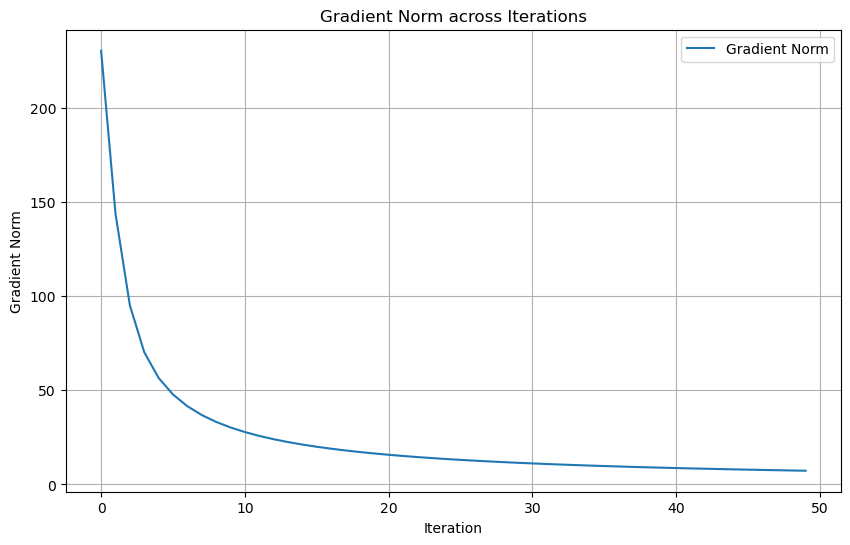

1.0


In [10]:
import matplotlib.pyplot as plt

X_0 = X
gradient_norms = []
for i in range(50): # number of iterations
    print(f'Loss at iteration {i} (SGD): {cost_function(X_0, A)}')

    # Gradient step

    # Calculate current gradient
    gradient_at_i = full_gradient(X_0)
    # Calculate the norm
    gradient_norms.append(np.linalg.norm(gradient_at_i))
    # Gradient step
    X_0 = X_0 - 0.001 * gradient_at_i

# Create an array of iteration numbers
iterations = np.arange(len(gradient_norms))

# Create Gradient Norm Plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, gradient_norms, label='Gradient Norm')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm across Iterations')
plt.legend()
plt.grid(True)
plt.show()

# See how X_0 performs :

result_matrix_descent = A @ X_0

# Find the column indices of maximum values for each row
labels_descent = np.argmax(result_matrix_descent, axis=1)

equal_entries = labels == labels_descent

# Count the number of True values (equal entries)
num_equal_entries = np.sum(equal_entries)

# Accuracy :
accuracy = num_equal_entries / len(labels)

print(accuracy)

## 7. BCGD with Randomized Rule Algorithm
We define as a block a single column in the parameter matrix $X$. Thus, one block defines all features for a single class. As this is a column vector in the matrix $X$, our partial gradient is now only dependent on $c$.

Then, our partial derivatives with respect with one block have the following form

\begin{equation}
\frac{\partial f(X)}{\partial X_{c}} = - A^{T} \cdot (I_c - Q_c) = A^{T} \cdot (- I_c + Q_c)
\end{equation}


where 

$A$ has shape $m \times d$, it is our given matrix A;
\
$I_c$ has shape $m \times 1$, it is the indicator vector containing $1$'s only at the positions where the label of the current sample $i$ is $c$ and $0$'s everywhere else;
$$
I_c=\begin{cases}
			1 \quad & \text{if $label_{i} = c $}\\
            0 \quad & \text{otherwise}
		 \end{cases}
$$
\
$Q_c$ has shape $m \times 1$, it is the vector calculating the exponential expression $\dfrac{\exp(x_{c}^{T}a_{i})}{\sum_{c' = 1}^{k} \exp(x_{c'}^{T}a_{i}) }$ for each sample $i$.

Thus, our result will be of form $d \times 1$.

Note that the calculations needed for $I_c$ and $Q_c$ only depend on $c$ and $i$. However, as we know all the samples $i$, we construct the vectors $I_c$ and $Q_c$ which are then only dependent on $c$.



## 8. BCGD Gauss-Southwell Algorithm

In [13]:
# We have to calculate the partial gradient of each block
# We calculate it in our partial_gradient function.
# Thus, we have to iterate over all possible blocks , which in our case are class - many, so k many 

def Gauss_Southwell(X):

    learning_rate = 0.01 # TODO : REPLACE BY LIPSCHITZ
    X_0 = X
    for it in range(20): # iterations
        
        all_partial_gradients = []
        for label_idx in range(k): # k is number of all labels
            # Calculate the partial gradient of each block
            all_partial_gradients.append(partial_gradient(X_0,label_idx))

        # Gradients will be of size (features,) so in our case (1000,) 
        all_partial_gradients_norms = [np.linalg.norm(curr_grad) for curr_grad in all_partial_gradients]

        max_idx = np.argmax(all_partial_gradients_norms)
   
        partial_grad = all_partial_gradients[max_idx]

        # Gradient Descent 
        print(f'Loss at iteration {it} (BCGD G.S.): {cost_function(X_0, A)}')
        # Gradient step
        X_0[:, max_idx] = X_0[:, max_idx] - learning_rate * partial_grad

In [14]:
# Lest's see how it performs
Gauss_Southwell(X)

Loss at iteration 0 (BCGD G.S.): 65.52651608068845
Loss at iteration 1 (BCGD G.S.): 60.92264138897008
Loss at iteration 2 (BCGD G.S.): 56.329917519076844
Loss at iteration 3 (BCGD G.S.): 51.992821623105556
Loss at iteration 4 (BCGD G.S.): 48.28754141960235
Loss at iteration 5 (BCGD G.S.): 44.62679757393198
Loss at iteration 6 (BCGD G.S.): 40.85854698084586
Loss at iteration 7 (BCGD G.S.): 37.935139386710944
Loss at iteration 8 (BCGD G.S.): 34.74116785499791
Loss at iteration 9 (BCGD G.S.): 31.941589967056643
Loss at iteration 10 (BCGD G.S.): 29.235876965452917
Loss at iteration 11 (BCGD G.S.): 26.470587285381043
Loss at iteration 12 (BCGD G.S.): 24.442809546046192
Loss at iteration 13 (BCGD G.S.): 22.78453206596896
Loss at iteration 14 (BCGD G.S.): 21.24839878171042
Loss at iteration 15 (BCGD G.S.): 19.975802719665808
Loss at iteration 16 (BCGD G.S.): 18.5650901003537
Loss at iteration 17 (BCGD G.S.): 17.42407098748663
Loss at iteration 18 (BCGD G.S.): 16.2608339603903
Loss at iteratio

## 9. Real Dataset

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

Modeling wine preferences by data mining from physicochemical properties.

In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
            [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
            [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

 
3. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

4. Number of Instances: red wine - 1599; white wine - 4898. 

5. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

6. Attribute information:

   Input variables (based on physicochemical tests):

      1 - fixed acidity
      
      2 - volatile acidity
      
      3 - citric acid
      
      4 - residual sugar
      
      5 - chlorides
      
      6 - free sulfur dioxide
      
      7 - total sulfur dioxide
      
      8 - density
      
      9 - pH
      
      10 - sulphates
      
      11 - alcohol
   
   Output variable (based on sensory data): 
   
      12 - quality (score between 0 and 10)



In [3]:
import pandas as pd 

# Adjust the path to the location of the dataset on your machine -----------------
data_red_wine = pd.read_csv('/Users/albertocalabrese99/Desktop/Optimization for Data Science/HW1/Data/winequality-red.csv', sep=';')
data_white_wine = pd.read_csv('/Users/albertocalabrese99/Desktop/Optimization for Data Science/HW1/Data/winequality-white.csv', sep=';')

# Let us define the labels from the dataset
labels_red = np.array(data_red_wine['quality'])
labels_white = np.array(data_red_wine['quality'])

# Let us see how many unique labels we have in both datasets
number_labels_red = np.unique(labels_red)
number_labels_white = np.unique(labels_white)

# Print the number of unique labels
print(len(number_labels_red))
print(number_labels_white)

# In both we only have labels from 3 to 8 (6 classes)

# Let us work on the red wine dataset
# Data matrix A

# Drop the quality column
data_red_wine.drop('quality', axis=1, inplace=True)

# Convert the data to a numpy array
A = np.array(data_red_wine)

print(A.shape[1])


6
[3 4 5 6 7 8]
11
